In [1]:
import pandas as pd 

In [2]:
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import dtale

In [3]:
# Leemos el DataFrame sobre el que vamos a trabajar
covid = pd.read_csv("owid-covid-data.csv")

# Cambiamos el formato de la columna data a datetime
covid['date'] = pd.to_datetime(covid['date'], format='%Y-%m-%d')

# Renombramos la columna "location" y la llamamos "country" y "human_development_index": "HDI"
covid.rename(columns={"location": "country", "human_development_index": "HDI"}, inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89679 entries, 0 to 89678
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               89679 non-null  object        
 1   continent                              85406 non-null  object        
 2   country                                89679 non-null  object        
 3   date                                   89679 non-null  datetime64[ns]
 4   total_cases                            86654 non-null  float64       
 5   new_cases                              86652 non-null  float64       
 6   new_cases_smoothed                     85651 non-null  float64       
 7   total_deaths                           76856 non-null  float64       
 8   new_deaths                             77014 non-null  float64       
 9   new_deaths_smoothed                    85651 non-null  float6

In [27]:
covid_date = covid.filter(["continent", "country", "date", "median_age", "aged_65_older", "aged_70_older", "total_cases", "total_deaths", "hospital_beds_per_thousand", "gdp_per_capita", "HDI"], axis=1)

covid_date = covid_date.resample('M', on="date").sum()
dtale.show(covid_date)

In [30]:
covid_group = covid.groupby("country").count()
list(covid_group.index)

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',
 'Faeroe Islands',
 'Falkland Islands',
 'Fi

In [5]:
# Creamos un DataFrame con las columnas que queremos
covid_data = covid.filter(["continent", "country", "median_age", "aged_65_older", "aged_70_older", "total_cases", "total_deaths", "hospital_beds_per_thousand", "gdp_per_capita", "HDI"], axis=1)


# Eliminamos los valores Nan y reseteamos el índice
covid_data.dropna(inplace=True)
covid_data.reset_index(drop=True, inplace=True)
covid_data

continent      country  median_age  aged_65_older  aged_70_older  \
0          Asia  Afghanistan        18.6          2.581          1.337   
1          Asia  Afghanistan        18.6          2.581          1.337   
2          Asia  Afghanistan        18.6          2.581          1.337   
3          Asia  Afghanistan        18.6          2.581          1.337   
4          Asia  Afghanistan        18.6          2.581          1.337   
...         ...          ...         ...            ...            ...   
61945    Africa     Zimbabwe        19.6          2.822          1.882   
61946    Africa     Zimbabwe        19.6          2.822          1.882   
61947    Africa     Zimbabwe        19.6          2.822          1.882   
61948    Africa     Zimbabwe        19.6          2.822          1.882   
61949    Africa     Zimbabwe        19.6          2.822          1.882   

       total_cases  total_deaths  hospital_beds_per_thousand  gdp_per_capita  \
0             34.0           1.0                         0.5        1803.987   
1             41.0           1.0                         0.5        1803.987   
2             43.0           1.0                         0.5        1803.987   
3             76.0           2.0                         0.5        1803.987   
4             80.0           3.0                         0.5        1803.987   
...            ...           ...                         ...             ...   
61945      38535.0        1582.0                         1.7        1899.775   
61946      38554.0        1582.0                         1.7        1899.775   
61947      38560.0        1582.0                         1.7        1899.775   
61948      38572.0        1582.0                         1.7        1899.775   
61949      38595.0        1583.0                         1.7        1899.775   

         HDI  
0      0.511  
1      0.511  
2      0.511  
3      0.511  
4      0.511  
...      ...  
61945  0.571  
61946  0.571  
61947  0.571  
61948  0.571  
61949  0.571  

[61950 rows x 10 columns]

In [6]:
covid_groupby = covid_data.groupby("country").max()
covid_groupby.reset_index(inplace=True)

# Añadimos nuevas columnas: el ratio de muertes y el porcentaje de personas con menos y más riesgo de muerte

covid_groupby["deaths_ratio"] = covid_groupby["total_deaths"]/covid_groupby["total_cases"] * 100
covid_groupby["non_risky_age"] = 100 - covid_groupby["aged_65_older"] - covid_groupby["aged_70_older"]
covid_groupby["risky_age"] = 100 - covid_groupby["non_risky_age"]

# Reordeno las columnas
covid_groupby = covid_groupby[["continent", "country", "median_age", "aged_65_older", "aged_70_older", "non_risky_age", "risky_age", "total_cases", "total_deaths", "deaths_ratio", "hospital_beds_per_thousand", "gdp_per_capita", "HDI"]]

covid_groupby

continent              country  median_age  aged_65_older  \
0             Asia          Afghanistan        18.6          2.581   
1           Europe              Albania        38.0         13.188   
2           Africa              Algeria        29.1          6.211   
3    North America  Antigua and Barbuda        32.1          6.933   
4    South America            Argentina        31.9         11.198   
..             ...                  ...         ...            ...   
150  South America            Venezuela        29.0          6.614   
151           Asia              Vietnam        32.6          7.150   
152           Asia                Yemen        20.3          2.922   
153         Africa               Zambia        17.7          2.480   
154         Africa             Zimbabwe        19.6          2.822   

     aged_70_older  non_risky_age  risky_age  total_cases  total_deaths  \
0            1.337         96.082      3.918      63819.0        2751.0   
1            8.643         78.169     21.831     132071.0        2436.0   
2            3.857         89.932     10.068     125693.0        3388.0   
3            4.631         88.436     11.564       1251.0          42.0   
4            7.441         81.361     18.639    3371508.0       71771.0   
..             ...            ...        ...          ...           ...   
150          3.915         89.471     10.529     217603.0        2428.0   
151          4.718         88.132     11.868       4512.0          37.0   
152          1.583         95.495      4.505       6586.0        1297.0   
153          1.542         95.978      4.022      92520.0        1263.0   
154          1.882         95.296      4.704      38595.0        1583.0   

     deaths_ratio  hospital_beds_per_thousand  gdp_per_capita    HDI  
0        4.310628                        0.50        1803.987  0.511  
1        1.844462                        2.89       11803.431  0.795  
2        2.695456                        1.90       13913.839  0.748  
3        3.357314                        3.80       21490.943  0.778  
4        2.128751                        5.00       18933.907  0.845  
..            ...                         ...             ...    ...  
150      1.115793                        0.80       16745.022  0.711  
151      0.820035                        2.60        6171.884  0.704  
152     19.693289                        0.70        1479.147  0.470  
153      1.365110                        2.00        3689.251  0.584  
154      4.101568                        1.70        1899.775  0.571  

[155 rows x 13 columns]

In [11]:
def drop(row):
    pobreza.drop(row, axis=0, inplace=True)
    return pobreza

In [12]:
drop(148)
drop(141)
drop(138)
drop(125)
drop(122)
drop(120)
drop(119)
drop(117)
drop(115)
drop(107)
drop(105)
drop(101)
drop(96)
drop(89)
drop(83)
drop(76)
drop(71)
drop(73)
drop(34)



Unnamed: 0    country  Poverty %
0             0    Albania       1.10
1             1    Algeria       0.80
2             2     Angola      47.90
3             3  Argentina       1.30
4             4    Armenia       2.40
..          ...        ...        ...
147         147    Uruguay       0.40
149         149   Viet Nam       1.12
150         150      Yemen      18.11
151         151     Zambia      57.80
152         152   Zimbabwe      33.12

[134 rows x 3 columns]

In [15]:
pobreza.loc[[149], ["country"]] 

country
149  Viet Nam

In [16]:
def change_name(row_in,new_name):
    pobreza.loc[[row_in], ["country"]] = new_name
    return pobreza

In [19]:
change_name(149, "Vietnam")
change_name(120, "Timor")
change_name(118, "Tanzania")
change_name(111, "Sudan")
change_name(104, "Russia")
change_name(84, "Moldova")



Unnamed: 0    country  Poverty %
0             0    Albania       1.10
1             1    Algeria       0.80
2             2     Angola      47.90
3             3  Argentina       1.30
4             4    Armenia       2.40
..          ...        ...        ...
147         147    Uruguay       0.40
149         149    Vietnam       1.12
150         150      Yemen      18.11
151         151     Zambia      57.80
152         152   Zimbabwe      33.12

[134 rows x 3 columns]

In [21]:
dictionary_pobre = {}
for pos, elem in enumerate(list(pobreza["country"].values)):
    key = pos
    value = elem
    dictionary_pobre[key] = value
dictionary_pobre

{0: 'Albania',
 1: 'Algeria',
 2: 'Angola',
 3: 'Argentina',
 4: 'Armenia',
 5: 'Australia',
 6: 'Austria',
 7: 'Bangladesh',
 8: 'Belarus',
 9: 'Belgium',
 10: 'Benin',
 11: 'Bhutan',
 12: 'Bolivia (Plurinational State of)',
 13: 'Bosnia and Herzegovina',
 14: 'Botswana',
 15: 'Brazil',
 16: 'Bulgaria',
 17: 'Burkina Faso',
 18: 'Burundi',
 19: 'Cabo Verde',
 20: 'Cameroon',
 21: 'Canada',
 22: 'Central African Republic',
 23: 'Chad',
 24: 'Chile',
 25: 'China',
 26: 'Colombia',
 27: 'Comoros',
 28: 'Congo',
 29: 'Congo (Democratic Republic of the)',
 30: 'Costa Rica',
 31: 'Croatia',
 32: 'Cyprus',
 33: 'Czechia',
 34: 'Denmark',
 35: 'Djibouti',
 36: 'Dominican Republic',
 37: 'Ecuador',
 38: 'Egypt',
 39: 'El Salvador',
 40: 'Estonia',
 41: 'Eswatini (Kingdom of)',
 42: 'Ethiopia',
 43: 'Fiji',
 44: 'Finland',
 45: 'France',
 46: 'Gabon',
 47: 'Gambia',
 48: 'Georgia',
 49: 'Germany',
 50: 'Ghana',
 51: 'Greece',
 52: 'Guatemala',
 53: 'Guinea',
 54: 'Guinea-Bissau',
 55: 'Haiti',


In [8]:
# Leemos el csv de pobreza
pobreza = pd.read_csv("pobreza_ratio.csv")
pobreza.rename(columns={"Country": "country"}, inplace=True)

# Unimos el DataFrame "covid_data_groupby" con este de pobreza
covid_data_pobreza = pd.merge(covid_groupby, pobreza, on="country", how="outer")
covid_data_pobreza.drop("Unnamed: 0", axis=1, inplace=True)
covid_data_pobreza

continent              country  median_age  aged_65_older  \
0             Asia          Afghanistan        18.6          2.581   
1           Europe              Albania        38.0         13.188   
2           Africa              Algeria        29.1          6.211   
3    North America  Antigua and Barbuda        32.1          6.933   
4    South America            Argentina        31.9         11.198   
..             ...                  ...         ...            ...   
185            NaN          Timor-Leste         NaN            NaN   
186            NaN                Tonga         NaN            NaN   
187            NaN               Tuvalu         NaN            NaN   
188            NaN              Vanuatu         NaN            NaN   
189            NaN             Viet Nam         NaN            NaN   

     aged_70_older  non_risky_age  risky_age  total_cases  total_deaths  \
0            1.337         96.082      3.918      63819.0        2751.0   
1            8.643         78.169     21.831     132071.0        2436.0   
2            3.857         89.932     10.068     125693.0        3388.0   
3            4.631         88.436     11.564       1251.0          42.0   
4            7.441         81.361     18.639    3371508.0       71771.0   
..             ...            ...        ...          ...           ...   
185            NaN            NaN        NaN          NaN           NaN   
186            NaN            NaN        NaN          NaN           NaN   
187            NaN            NaN        NaN          NaN           NaN   
188            NaN            NaN        NaN          NaN           NaN   
189            NaN            NaN        NaN          NaN           NaN   

     deaths_ratio  hospital_beds_per_thousand  gdp_per_capita    HDI  \
0        4.310628                        0.50        1803.987  0.511   
1        1.844462                        2.89       11803.431  0.795   
2        2.695456                        1.90       13913.839  0.748   
3        3.357314                        3.80       21490.943  0.778   
4        2.128751                        5.00       18933.907  0.845   
..            ...                         ...             ...    ...   
185           NaN                         NaN             NaN    NaN   
186           NaN                         NaN             NaN    NaN   
187           NaN                         NaN             NaN    NaN   
188           NaN                         NaN             NaN    NaN   
189           NaN                         NaN             NaN    NaN   

     Poverty %  
0          NaN  
1         1.10  
2         0.80  
3          NaN  
4         1.30  
..         ...  
185      30.10  
186       1.30  
187       3.60  
188      13.50  
189       1.12  

[190 rows x 14 columns]

In [31]:
# Unimos el DataFrame "covid_data_groupby" con este de pobreza
covid_data_pobreza = pd.merge(covid_groupby, pobreza, on="country", how="outer")
covid_data_pobreza.drop("Unnamed: 0", axis=1, inplace=True)

In [25]:
dictionary = {}
for pos, elem in enumerate(list(covid_data_pobreza["country"].values)):
    key = pos
    value = elem
    dictionary[key] = value
dictionary

{0: 'Afghanistan',
 1: 'Albania',
 2: 'Algeria',
 3: 'Antigua and Barbuda',
 4: 'Argentina',
 5: 'Armenia',
 6: 'Australia',
 7: 'Austria',
 8: 'Azerbaijan',
 9: 'Bahamas',
 10: 'Bahrain',
 11: 'Bangladesh',
 12: 'Barbados',
 13: 'Belarus',
 14: 'Belgium',
 15: 'Belize',
 16: 'Benin',
 17: 'Bhutan',
 18: 'Bolivia',
 19: 'Bosnia and Herzegovina',
 20: 'Botswana',
 21: 'Brazil',
 22: 'Brunei',
 23: 'Bulgaria',
 24: 'Burkina Faso',
 25: 'Burundi',
 26: 'Cambodia',
 27: 'Cameroon',
 28: 'Canada',
 29: 'Cape Verde',
 30: 'Central African Republic',
 31: 'Chile',
 32: 'China',
 33: 'Colombia',
 34: 'Comoros',
 35: 'Costa Rica',
 36: 'Croatia',
 37: 'Cyprus',
 38: 'Czechia',
 39: 'Denmark',
 40: 'Djibouti',
 41: 'Dominican Republic',
 42: 'Ecuador',
 43: 'Egypt',
 44: 'El Salvador',
 45: 'Equatorial Guinea',
 46: 'Eritrea',
 47: 'Estonia',
 48: 'Eswatini',
 49: 'Ethiopia',
 50: 'Fiji',
 51: 'Finland',
 52: 'France',
 53: 'Gabon',
 54: 'Gambia',
 55: 'Georgia',
 56: 'Germany',
 57: 'Ghana',
 5

In [11]:
covid_data.to_csv("0-covid_data.csv")
covid_groupby.to_csv("0-covid_groupby.csv")
covid_data_pobreza.to_csv("0_covid_pobreza.csv")

<AxesSubplot:>

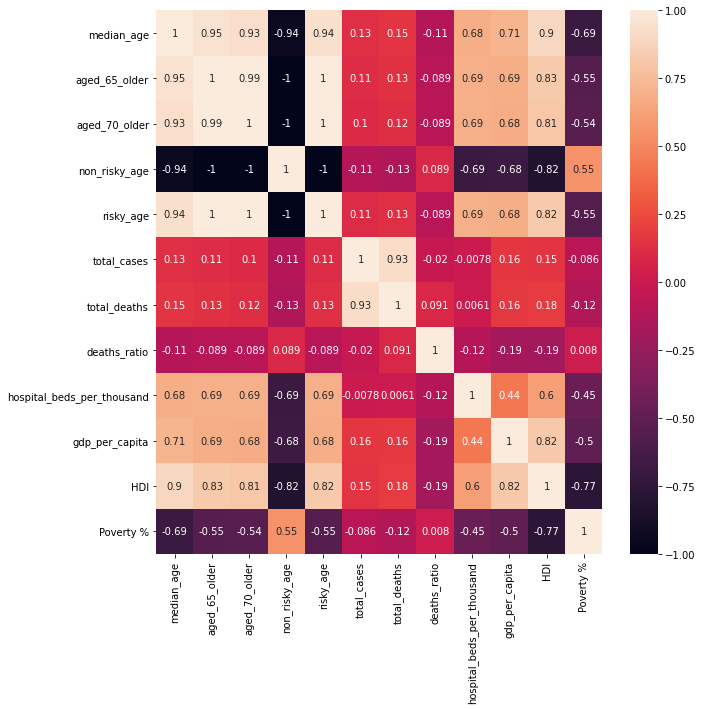

In [12]:
# Hacemos un heatmap para ver la correlacion entre las diferentes columnas del DataFrame
plt.figure(figsize=(10,10))
sns.heatmap(covid_data_pobreza.corr(), annot=True)

In [13]:
covid_data_pobreza.corr()

"""Interpretación de las correlaciones: 

median_age : 
- Mucha correlación positiva: cuanto mayor 

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-2e88d1a32966>, line 6)